<a href="https://colab.research.google.com/github/Pandidharan/mnist-classification/blob/main/Ex03_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandidharan.G.R
212222040111


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8392 - loss: 0.5206 - val_accuracy: 0.9704 - val_loss: 0.0926
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.9736 - loss: 0.0867 - val_accuracy: 0.9787 - val_loss: 0.0623
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9824 - loss: 0.0574 - val_accuracy: 0.9812 - val_loss: 0.0541
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9869 - loss: 0.0440 - val_accuracy: 0.9825 - val_loss: 0.0518
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9826 - val_loss: 0.0516


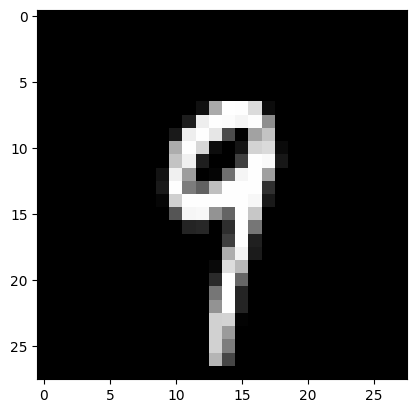

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

X_test.shape

single_image= X_train[5]

single_image.shape

plt.imshow(single_image,cmap='gray')

y_train.shape

X_train.min()

X_train.max()

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

X_train_scaled.min()

X_train_scaled.max()

y_train[0]

y_train[0]

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

type(y_train_onehot)

y_train_onehot.shape

single_image = X_train[600]
plt.imshow(single_image,cmap='gray')

y_train_onehot[600]

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


print('''Pandidharan.G.R
212222040111''')
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

metrics = pd.DataFrame(model.history.history)

In [29]:
print('''Pandidharan.G.R
212222040111''')
print(metrics.head())

x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

Pandidharan.G.R
212222040111
   accuracy      loss  val_accuracy  val_loss
0  0.922800  0.257211        0.9704  0.092593
1  0.974667  0.082229        0.9787  0.062346
2  0.982817  0.057404        0.9812  0.054088
3  0.986050  0.045256        0.9825  0.051758
4  0.988167  0.037316        0.9826  0.051611
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Pandidharan.G.R
212222040111


<Axes: >

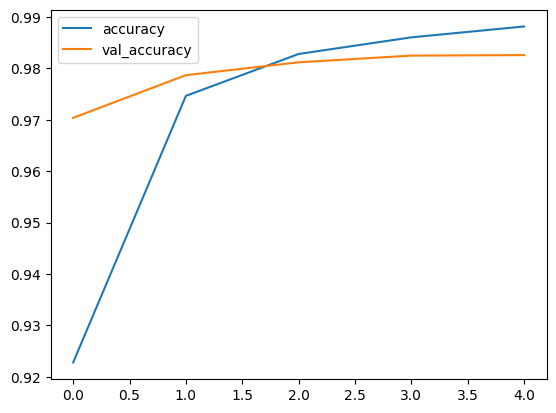

In [30]:
print('''Pandidharan.G.R
212222040111''')
metrics[['accuracy','val_accuracy']].plot()

Pandidharan.G.R
212222040111


<Axes: >

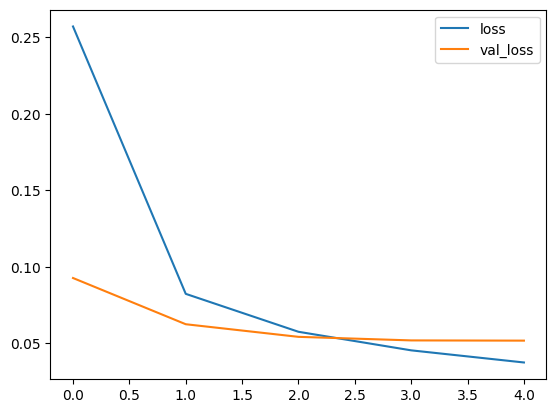

In [31]:
print('''Pandidharan.G.R
212222040111''')
metrics[['loss','val_loss']].plot()

In [32]:
print('''Pandidharan.G.R
212222040111''')
print(confusion_matrix(y_test,x_test_predictions))

Pandidharan.G.R
212222040111
[[ 968    0    3    0    0    2    5    1    1    0]
 [   0 1129    2    0    0    0    0    3    1    0]
 [   1    2 1015    0    1    0    0   10    3    0]
 [   0    0    4  999    0    4    0    1    2    0]
 [   0    0    4    0  948    0    1    2    7   20]
 [   2    1    1    8    0  879    1    0    0    0]
 [   5    2    1    0    1    7  941    0    1    0]
 [   0    0    7    1    0    0    0 1016    1    3]
 [   4    0    4    9    0    7    2    2  943    3]
 [   2    0    0    4    2    5    0    5    3  988]]


In [33]:
print('''Pandidharan.G.R
212222040111''')
print(classification_report(y_test,x_test_predictions))

Pandidharan.G.R
212222040111
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       1.00      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



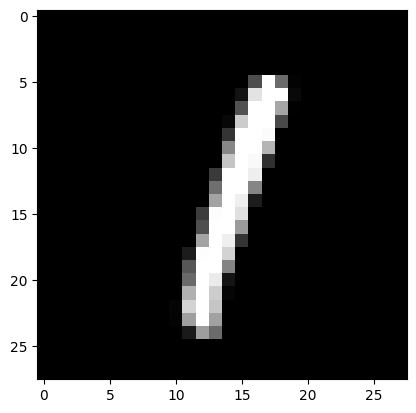

In [36]:
img = X_test_scaled[5]
img.shape
plt.imshow(img,cmap='gray')

In [38]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_tensor.shape
img_28 = tf.image.resize(img_tensor,(28,28))
#img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28.numpy()/255.0



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[1]
Pandidharan.G.R
212222040111


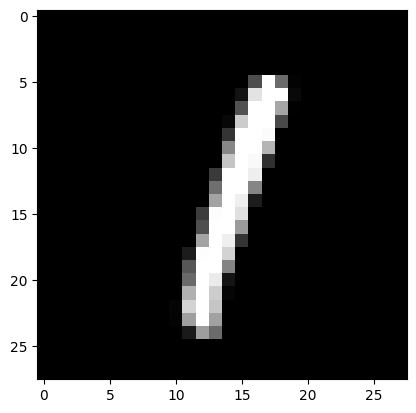

In [39]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

print(x_single_prediction)

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print('''Pandidharan.G.R
212222040111''')